In [1]:
import pint
from modsim import *
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7)

# Part 1 - Falling Pennies Model

Complete the falling pennies model found [here](https://github.com/AllenDowney/ModSimPy/blob/master/notebooks/chap01.ipynb).

--- 

## The Penny Myth

The following cells contain code from the beginning of Chapter 1.

`modsim` defines `UNITS`, which contains variables representing pretty much every unit you've ever heard of. It uses Pint, which is a Python library that provides tools for computing with units.

The following lines create new variables named meter and second.

In [2]:
meter = UNITS.meter
second = UNITS.second

To find out what other units are defined, type UNITS. (including the period) in the next cell and then press TAB. You should see a pop-up menu with a list of units.

Create a variable named $a$ and give it the value of acceleration due to gravity.

In [3]:
a = 9.8 * meter / second**2

Create $t$ and give it the value 4 seconds.

In [4]:
t = 4 * second

Compute the distance a penny would fall after $t$ seconds with constant acceleration $a$. Notice that the units of the result are correct.

In [5]:
a * t**2 / 2

78.4 <Unit('meter')>

<b>Exercise:</b> Compute the velocity of the penny after t seconds. Check that the units of the result are correct.

---

Formua is $v_f = v_i + at$, and since $v_i$ is 0 in this case we can find the velocity by simply multiplying the acceleration and time. 


In [6]:
a * t

39.2 <Unit('meter / second')>

<b>Exercise:</b> Why would it be nonsensical to add a and t? What happens if you try?

---

You cannot add values that have different units, as it does not make sense. If I try in the cell below I get a dimensionality error, which complains about how its not possible to add a variable with units of seconds to a variable with units of meters per second squared. 

In [7]:
#a + t

## Falling pennies

Now let's solve the falling penny problem.

Set $h$ to the height of the Empire State Building:

In [8]:
h = 381 * meter

Compute the time it would take a penny to fall, assuming constant acceleration.

$at^2 / 2 = h$

$t = \sqrt{2h/a}$

In [9]:
t = sqrt(2 * h / a)

Given $t$, we can compute the velocity of the penny when it lands.

In [10]:
v = a * t

We can convert from one set of units to another like this:

In [11]:
mile = UNITS.mile
hour = UNITS.hour
v.to(mile/hour)

193.30546802805432 <Unit('mile / hour')>

<b>Exercise:</b> Suppose you bring a 10 foot pole to the top of the Empire State Building and use it to drop the penny from h plus 10 feet.

Define a variable named foot that contains the unit foot provided by UNITS. Define a variable named pole_height and give it the value 10 feet.

What happens if you add h, which is in units of meters, to pole_height, which is in units of feet? What happens if you write the addition the other way around?

---

Since `pole_height` and `h` are both measuring distance they are able to be combined via addition, despite the fact that one of the variables needs to be converted into the units of the other. The resultant units after the addition is performed are the same as those of the first variable provided in the addition expression. For example, `h + pole_height` will provide a result in meters since `h` is measured in meters. 

In [12]:
foot = UNITS.foot
pole_height = 10 * foot
h + pole_height 

384.048 <Unit('meter')>

In [13]:
pole_height + h

1260.0 <Unit('foot')>

<b>Exercise:</b> In reality, air resistance limits the velocity of the penny. At about 18 m/s, the force of air resistance equals the force of gravity and the penny stops accelerating.

As a simplification, let's assume that the acceleration of the penny is a until the penny reaches 18 m/s, and then 0 afterwards. What is the total time for the penny to fall 381 m?

You can break this question into three parts:

1. How long until the penny reaches 18 m/s with constant acceleration a.
2. How far would the penny fall during that time?
3. How long to fall the remaining distance with constant velocity 18 m/s?

Suggestion: Assign each intermediate result to a variable with a meaningful name. And assign units to all quantities!



In [14]:
# Method 1: Solve using loop, iterating values over time until 381m is reached.

d = 0
t = 0
t_step = 0.01
v = 0 
ds = [d]
ts = [t]
vs = [v]

while d < 381: 
    t = t + t_step
    if v > 18:
        a = 0
        v = 18
    else:
        a = 9.8
    d = d + v * t_step + 0.5 * a * t_step ** 2
    v = v + a * t_step
    ds.append(d)
    vs.append(v)
    ts.append(t)
    
# get time to reach terminal velocity 

t_term = 18 / 9.8

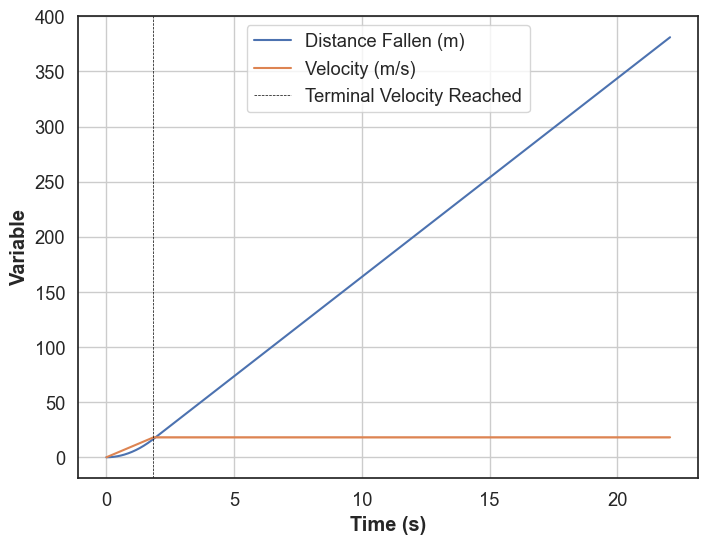

In [15]:
# plot d as a function of t

plt.figure(figsize=(8,6))
plt.plot(ts, ds, label='Distance Fallen (m)')
plt.plot(ts, vs, label='Velocity (m/s)')
plt.xlabel('Time (s)', fontweight='bold')
plt.ylabel('Variable', fontweight='bold')
plt.axvline(t_term, label='Terminal Velocity Reached', color='black', ls='--', lw=0.5)
plt.legend()
plt.grid()
plt.show()

We see from the figures above that velocity increases linearly until the penny reaches its terminal velocity of 18 m/s. This translates to a distance graph that is parabolic in shape until terminal velcoity is reached, and then continues linearly afterwards. All told, this method revealed that it took approximately 21.17 seconds for the penny to fall 381 m (the height of the empire state building). 

In [16]:
ts[-1]

22.06000000000065

In [17]:
# Method 2: Check via direct calculation

a = 9.8 * meter / second ** 2
v_term = 18 * meter / second
d = 381 * meter

# get time and distance it takes before penny reaches terminal velocity
t_to_term = v_term / a
d_to_term = a * 0.5 * t_to_term ** 2

# get time and distance it takes after penny reaches terminal velocit
d_post_term = d - d_to_term
t_post_term = d_post_term / v_term

# get total time it takes for the penny to fall
t_total = t_to_term + t_post_term
t_total

22.085034013605444 <Unit('second')>

We see that the direct calculation of the time it takes for the penny to fall 381m aligns almost exactly with the result of the loop calculation. 

# Part 2
Complete the exercises for chapter 2 found [here](https://github.com/AllenDowney/ModSimPy/blob/master/notebooks/chap02.ipynb).

## Modeling a bikeshare system

We'll start with a `State` object that represents the number of bikes at each station.

When you display a `State` object, it lists the state variables and their values:

In [18]:
bikeshare = State(olin=10, wellesley=2)

We can access the state variables using dot notation.

In [19]:
bikeshare.olin

10

In [20]:
bikeshare.wellesley

2

**Exercise:** What happens if you spell the name of a state variable wrong?  Edit the previous cell, change the spelling of `wellesley`, and run the cell again.

The error message uses the word "attribute", which is another name for what we are calling a state variable. 

In [21]:
#bikeshare.wellesle

**Exercise:** Add a third attribute called `babson` with initial value 0, and display the state of `bikeshare` again.

In [22]:
bikeshare = State(olin=10, wellesley=2, babson=0)
bikeshare

,values
olin,10
wellesley,2
babson,0


## Updating

We can use the update operators `+=` and `-=` to change state variables.

In [23]:
bikeshare.olin -= 1

If we display `bikeshare`, we should see the change.

In [24]:
bikeshare

,values
olin,9
wellesley,2
babson,0


Of course, if we subtract a bike from `olin`, we should add it to `wellesley`.

In [25]:
bikeshare.wellesley += 1
bikeshare

,values
olin,9
wellesley,3
babson,0


## Functions

We can take the code we've written so far and encapsulate it in a function.

In [26]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

When you define a function, it doesn't run the statements inside the function, yet.  When you call the function, it runs the statements inside.

In [27]:
bike_to_wellesley()
bikeshare

,values
olin,8
wellesley,4
babson,0



One common error is to omit the parentheses, which has the effect of looking up the function, but not calling it.

In [28]:
bike_to_wellesley

<function __main__.bike_to_wellesley()>

The output indicates that `bike_to_wellesley` is a function defined in a "namespace" called `__main__`, but you don't have to understand what that means.

**Exercise:** Define a function called `bike_to_olin` that moves a bike from Wellesley to Olin.  Call the new function and display `bikeshare`  to confirm that it works.

In [29]:
def bike_to_olin():
    bikeshare.olin += 1
    bikeshare.wellesley -= 1

In [30]:
bike_to_olin()
bikeshare

,values
olin,9
wellesley,3
babson,0


## Conditionals

`modsim.py` provides `flip`, which takes a probability and returns either `True` or `False`, which are special values defined by Python.

The Python function `help` looks up a function and displays its documentation.

In [31]:
help(flip)

Help on function flip in module modsim.modsim:

flip(p=0.5)
    Flips a coin with the given probability.
    
    p: float 0-1
    
    returns: boolean (True or False)



In the following example, the probability is 0.7 or 70%.  If you run this cell several times, you should get `True` about 70% of the time and `False` about 30%.

In [32]:
flip(0.7)

True

In the following example, we use `flip` as part of an if statement.  If the result from `flip` is `True`, we print `heads`; otherwise we do nothing.

In [33]:
if flip(0.7):
    print('heads')

With an else clause, we can print heads or tails depending on whether `flip` returns `True` or `False`.

In [34]:
if flip(0.7):
    print('heads')
else:
    print('tails')

heads


## Step

Now let's get back to the bikeshare state.  Again let's start with a new `State` object.

In [35]:
bikeshare = State(olin=10, wellesley=2)

Suppose that in any given minute, there is a 50% chance that a student picks up a bike at Olin and rides to Wellesley.  We can simulate that like this.

In [36]:
if flip(0.5):
    bike_to_wellesley()
    print('Moving a bike to Wellesley')

bikeshare

,values
olin,10
wellesley,2


And maybe at the same time, there is also a 40% chance that a student at Wellesley rides to Olin.

In [37]:
if flip(0.4):
    bike_to_olin()
    print('Moving a bike to Olin')

bikeshare

,values
olin,10
wellesley,2


We can wrap that code in a function called `step` that simulates one time step.  In any given minute, a student might ride from Olin to Wellesley, from Wellesley to Olin, or both, or neither, depending on the results of `flip`.

In [38]:
def step():
    if flip(0.5):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(0.4):
        bike_to_olin()
        print('Moving a bike to Olin')

Since this function takes no parameters, we call it like this:

In [39]:
step()
bikeshare

,values
olin,10
wellesley,2


## Parameters

As defined in the previous section, `step` is not as useful as it could be, because the probabilities `0.5` and `0.4` are "hard coded".

It would be better to generalize this function so it takes the probabilities `p1` and `p2` as parameters:

In [40]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(p2):
        bike_to_olin()
        print('Moving a bike to Olin')

Now we can call it like this:

In [41]:
step(0.5, 0.4)
bikeshare

Moving a bike to Wellesley
Moving a bike to Olin


,values
olin,10
wellesley,2


**Exercise:** At the beginning of `step`, add a print statement that displays the values of `p1` and `p2`.  Call it again with values `0.3`, and `0.2`, and confirm that the values of the parameters are what you expect. 

In [42]:
def step(p1, p2):
    print("p1 = %.2f, p2 = %.2f" %(p1, p2))
    if flip(p1):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(p2):
        bike_to_olin()
        print('Moving a bike to Olin')

step(0.3, 0.2)

p1 = 0.30, p2 = 0.20


## For loop

Before we go on, I'll redefine `step` without the print statements.

In [43]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

And let's start again with a new `State` object:

In [44]:
bikeshare = State(olin=10, wellesley=2)

We can use a `for` loop to move 4 bikes from Olin to Wellesley.

In [45]:
for i in range(4):
    bike_to_wellesley()
    
bikeshare

,values
olin,6
wellesley,6


Or we can simulate 4 random time steps.

In [46]:
for i in range(4):
    step(0.3, 0.2)
    
bikeshare

,values
olin,5
wellesley,7


If each step corresponds to a minute, we can simulate an entire hour like this.

In [47]:
for i in range(60):
    step(0.3, 0.2)

bikeshare

,values
olin,4
wellesley,8


After 60 minutes, you might see that the number of bike at Olin is negative.  We'll fix that problem in the next notebook.

But first, we want to plot the results.

## TimeSeries

`modsim.py` provides an object called a `TimeSeries` that can contain a sequence of values changing over time.

We can create a new, empty `TimeSeries` like this:

In [48]:
results = TimeSeries()

And we can add a value to the `TimeSeries` like this:

In [49]:
results[0] = bikeshare.olin
results

,values
0,4


The `0` in brackets is an `index` that indicates that this value is associated with time step 0.

Now we'll use a for loop to save the results of the simulation.  I'll start one more time with a new `State` object.

In [50]:
bikeshare = State(olin=10, wellesley=2)

Here's a for loop that runs 10 steps and stores the results.

In [51]:
for i in range(10):
    step(0.3, 0.2)
    results[i] = bikeshare.olin

Now we can display the results.

In [52]:
results

,values
0,10
1,10
2,9
3,9
4,10
5,10
6,10
7,11
8,11
9,11


A `TimeSeries` is a specialized version of a Pandas `Series`, so we can use any of the functions provided by `Series`, including several that compute summary statistics:

In [53]:
results.mean()

10.1

In [54]:
results.describe()

count    10.000000
mean     10.100000
std       0.737865
min       9.000000
25%      10.000000
50%      10.000000
75%      10.750000
max      11.000000
dtype: float64

You can read the documentation of `Series` [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).

## Plotting

We can also plot the results like this.

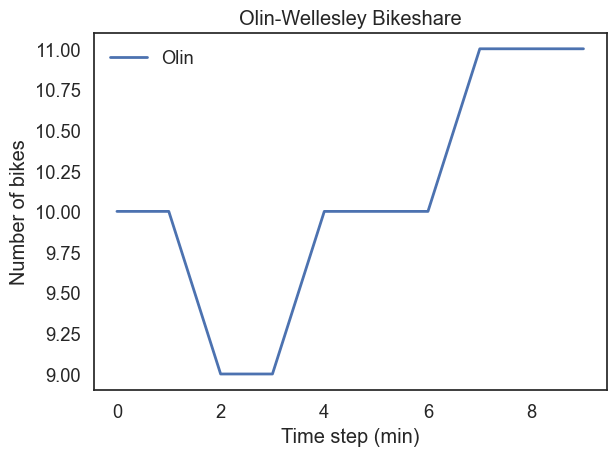

In [55]:
plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

#savefig('chap02-fig01.pdf')

`decorate`, which is defined in the `modsim` library, adds a title and labels the axes.

In [56]:
help(decorate)

Help on function decorate in module modsim.modsim:

decorate(**options)
    Decorate the current axes.
    
    Call decorate with keyword arguments like
    
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    
    The keyword arguments can be any of the axis properties
    
    https://matplotlib.org/api/axes_api.html
    
    In addition, you can use `legend=False` to suppress the legend.
    
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')



`savefig()` saves a figure in a file.

In [57]:
help(savefig)

Help on function savefig in module modsim.modsim:

savefig(filename, **options)
    Save the current figure.
    
    Keyword arguments are passed along to plt.savefig
    
    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
    
    filename: string



The suffix of the filename indicates the format you want.  This example saves the current figure in a PDF file.

**Exercise:** Wrap the code from this section in a function named `run_simulation` that takes three parameters, named `p1`, `p2`, and `num_steps`.

It should:

1. Create a `TimeSeries` object to hold the results.
2. Use a for loop to run `step` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.
3. After each step, it should save the number of bikes at Olin in the `TimeSeries`.
4. After the for loop, it should plot the results and
5. Decorate the axes.

To test your function:

1. Create a `State` object with the initial state of the system.
2. Call `run_simulation` with appropriate parameters.
3. Save the resulting figure.

Optional:

1. Extend your solution so it creates two `TimeSeries` objects, keeps track of the number of bikes at Olin *and* at Wellesley, and plots both series at the end.

In [58]:
def run_simulation(p1, p2, num_steps):
    
    # initialize TimeSeries objects to store results
    results_olin = TimeSeries()
    results_wellesley = TimeSeries()
    
    # loop through steps, storing results
    for i in range(num_steps):
        step(p1, p2)
        # handling for if the number of bikes goes below 0.
        if bikeshare.olin < 0:
            bikeshare.olin += 1
            bikeshare.wellesley -= 1
        if bikeshare.wellesley < 0:
            bikeshare.olin -= 1
            bikeshare.wellesley += 1
        results_olin[i] = bikeshare.olin
        results_wellesley[i] = bikeshare.wellesley
    
    # plot results
    plot(results_olin, label='Olin')
    plot(results_wellesley, label='Wellesley')
    decorate(title='Olin-Wellesley Bikeshare',
    xlabel='Time step (min)', 
    ylabel='Number of bikes')

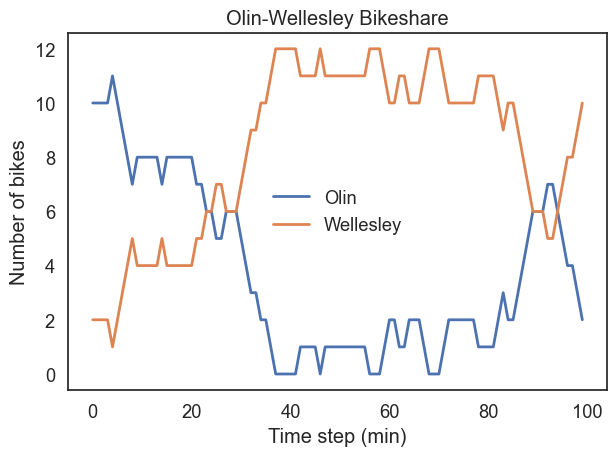

In [59]:
# test function
bikeshare = State(olin=10, wellesley=2)
run_simulation(0.3, 0.2, 100)

We see above from the output of the `run_simulation` function that it plots the number of bikes at both Wellesley and Olin over time. 

## Opening the hood

The functions in `modsim.py` are built on top of several widely-used Python libraries, especially NumPy, SciPy, and Pandas.  These libraries are powerful but can be hard to use.  The intent of `modsim.py` is to give you the power of these libraries while making it easy to get started.

In the future, you might want to use these libraries directly, rather than using `modsim.py`.  So we will pause occasionally to open the hood and let you see how `modsim.py` works.

You don't need to know anything in these sections, so if you are already feeling overwhelmed, you might want to skip them.  But if you are curious, read on.

### Pandas

This chapter introduces two objects, `State` and `TimeSeries`.  Both are based on the `Series` object defined by Pandas, which is a library primarily used for data science.

You can read the documentation of the `Series` object [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

The primary differences between `TimeSeries` and `Series` are:

1. I made it easier to create a new, empty `Series` while avoiding a [confusing inconsistency](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).

2. I provide a function so the `Series` looks good when displayed in Jupyter.

3. I provide a function called `set` that we'll use later.

`State` has all of those capabilities; in addition, it provides an easier way to initialize state variables, and it provides functions called `T` and `dt`, which will help us avoid a confusing error later.

### Pyplot

The `plot` function in `modsim.py` is based on the `plot` function in Pyplot, which is part of Matplotlib.  You can read the documentation of `plot` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

`decorate` provides a convenient way to call the `pyplot` functions `title`, `xlabel`, and `ylabel`, and `legend`.  It also avoids an annoying warning message if you try to make a legend when you don't have any labelled lines.

In [60]:
help(decorate)

Help on function decorate in module modsim.modsim:

decorate(**options)
    Decorate the current axes.
    
    Call decorate with keyword arguments like
    
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    
    The keyword arguments can be any of the axis properties
    
    https://matplotlib.org/api/axes_api.html
    
    In addition, you can use `legend=False` to suppress the legend.
    
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')



### NumPy

The `flip` function in `modsim.py` uses NumPy's `random` function to generate a random number between 0 and 1.

You can get the source code for `flip` by running the following cell.

In [61]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p



# Part 3
Complete the exercises for chapter 3 found [here](https://github.com/AllenDowney/ModSimPy/blob/master/notebooks/chap03.ipynb).

## More than one State object

Here's the code from the previous chapter, with two changes:

1. I've added DocStrings that explain what each function does, and what parameters it takes.

2. I've added a parameter named `state` to the functions so they work with whatever `State` object we give them, instead of always using `bikeshare`.  That makes it possible to work with more than one `State` object.

In [62]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

And here's `run_simulation`, which is a solution to the exercise at the end of the previous notebook.

In [63]:
def run_simulation(state, p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results = TimeSeries()    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = state.olin
        
    plot(results, label='Olin')

Now we can create more than one `State` object:

In [64]:
bikeshare1 = State(olin=10, wellesley=2)

In [65]:
bikeshare2 = State(olin=2, wellesley=10)

Whenever we call a function, we indicate which `State` object to work with:

In [66]:
bike_to_olin(bikeshare1)

In [67]:
bike_to_wellesley(bikeshare2)

And you can confirm that the different objects are getting updated independently:

In [68]:
bikeshare1

,values
olin,11
wellesley,1


In [69]:
bikeshare2

,values
olin,1
wellesley,11


## Negative bikes

In the code we have so far, the number of bikes at one of the locations can go negative, and the number of bikes at the other location can exceed the actual number of bikes in the system.

If you run this simulation a few times, it happens often.

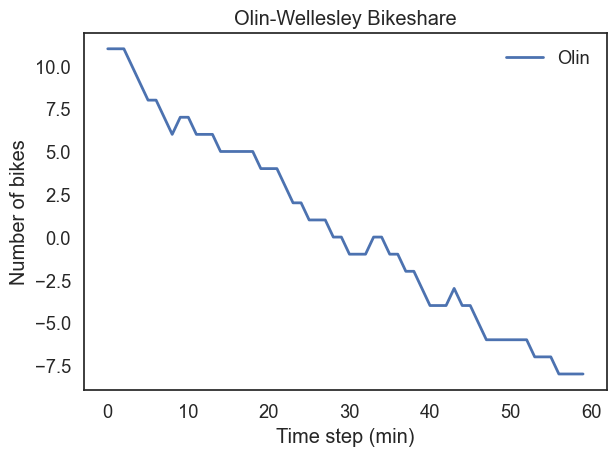

In [70]:
bikeshare = State(olin=10, wellesley=2)
run_simulation(bikeshare, 0.4, 0.2, 60)
decorate_bikeshare()

We can fix this problem using the `return` statement to exit the function early if an update would cause negative bikes.

In [71]:
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        return
    state.wellesley -= 1
    state.olin += 1

Now if you run the simulation again, it should behave.

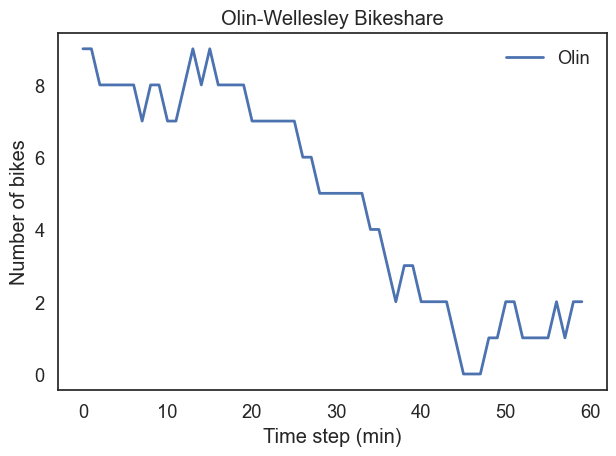

In [72]:
bikeshare = State(olin=10, wellesley=2)
run_simulation(bikeshare, 0.4, 0.2, 60)
decorate_bikeshare()

## Comparison operators

The `if` statements in the previous section used the comparison operator `==`.  The other comparison operators are listed in the book.

It is easy to confuse the comparison operator `==` with the assignment operator `=`.

Remember that `=` creates a variable or gives an existing variable a new value.

In [73]:
x = 5

Whereas `==` compares two values and returns `True` if they are equal.

In [74]:
x == 5

True

You can use `==` in an `if` statement.

In [75]:
if x == 5:
    print('yes, x is 5')

yes, x is 5


But if you use `=` in an `if` statement, you get an error.

In [76]:
# If you remove the # from the if statement and run it, you'll get
# SyntaxError: invalid syntax

#if x = 5:
#    print('yes, x is 5')

**Exercise:** Add an `else` clause to the `if` statement above, and print an appropriate message.

Replace the `==` operator with one or two of the other comparison operators, and confirm they do what you expect.

In [77]:
x = 4
#x = 5
#x = 6 

if x == 5:
    print('yes, x is 5.')
elif x > 5:
    print('x is greater than 5.')
else:
    print('x is less than 5.')  

x is less than 5.


## Metrics

Now that we have a working simulation, we'll use it to evaluate alternative designs and see how good or bad they are.  The metric we'll use is the number of customers who arrive and find no bikes available, which might indicate a design problem.

First we'll make a new `State` object that creates and initializes additional state variables to keep track of the metrics.

In [78]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)

Next we need versions of `bike_to_wellesley` and `bike_to_olin` that update the metrics.

In [79]:
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

Now when we run a simulation, it keeps track of unhappy customers.

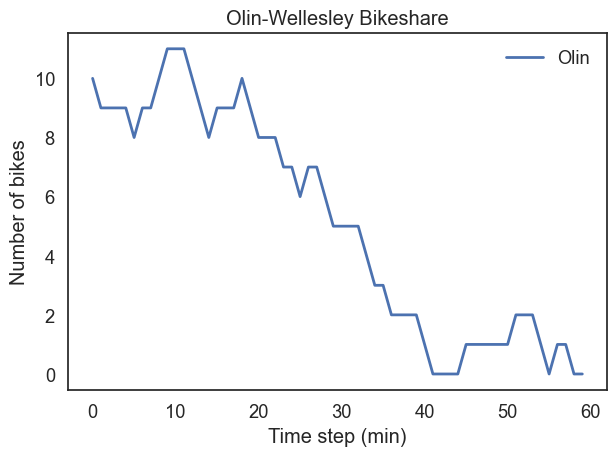

In [80]:
run_simulation(bikeshare, 0.4, 0.2, 60)
decorate_bikeshare()

After the simulation, we can print the number of unhappy customers at each location.

In [81]:
bikeshare.olin_empty

2

In [82]:
bikeshare.wellesley_empty

0

## Exercises

**Exercise:** As another metric, we might be interested in the time until the first customer arrives and doesn't find a bike.  To make that work, we have to add a "clock" to keep track of how many time steps have elapsed:

1. Create a new `State` object with an additional state variable, `clock`, initialized to 0. 

2. Write a modified version of `step` that adds one to the clock each time it is invoked.

Test your code by running the simulation and check the value of `clock` at the end.

In [83]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0,
                  clock=0)

In [84]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
    
    state.clock += 1

In [85]:
def run_simulation(state, p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results = TimeSeries()    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = state.olin
        
    plot(results, label='Olin')

100

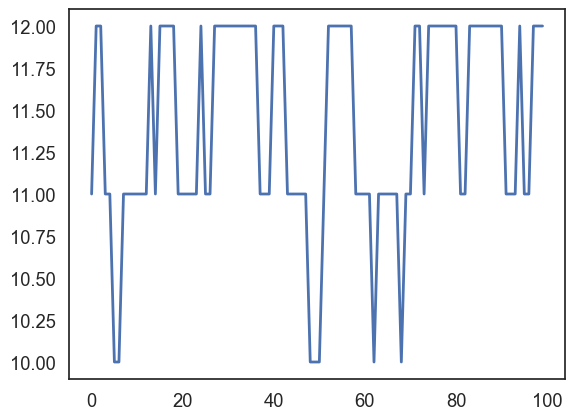

In [86]:
run_simulation(bikeshare, 0.3, 0.3, 100)
bikeshare.clock

**Exercise:** Continuing the previous exercise, let's record the time when the first customer arrives and doesn't find a bike.

1. Create a new `State` object with an additional state variable, `t_first_empty`, initialized to -1 as a special value to indicate that it has not been set. 

2. Write a modified version of `step` that checks whether`olin_empty` and `wellesley_empty` are 0.  If not, it should set `t_first_empty` to `clock` (but only if `t_first_empty` has not already been set).

Test your code by running the simulation and printing the values of `olin_empty`, `wellesley_empty`, and `t_first_empty` at the end.

In [92]:
bikeshare = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0,
                  clock=0, t_first_empty=-1)

In [93]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
    
    state.clock += 1
    if (state.olin_empty > 0 or state.olin_empty > 0) and state.t_first_empty == -1:
        state.t_first_empty = state.clock

In [94]:
def run_simulation(state, p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results = TimeSeries()    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = state.olin
        print(state.olin)
        
    plot(results, label='Olin')

9
8
8
7
6
5
4
4
4
3
3
2
3
2
1
0
0
0
0
0


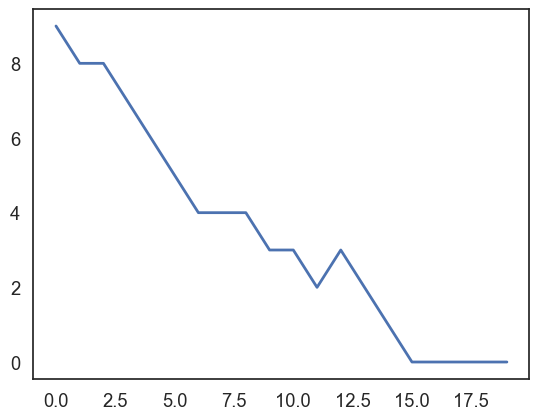

In [95]:
run_simulation(bikeshare, 0.9, 0.3, 20)

In [96]:
bikeshare.t_first_empty

18

We see from the above output that the bike rack first went empty at 17 minutes, and then at 18 minutes someone was turned away because there was no bike for them to ride. As such, the new function is working correctly. 